In [2]:
using CSV
using DataFrames
using Clustering
using Plots
using Distances

In [3]:
data = CSV.read("penguins.csv",DataFrame)

Row,Column1,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
,Int64,String15,String15,String7,String7,String3,String7,String7,Int64
1,1,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
2,2,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
3,3,Adelie,Torgersen,40.3,18,195,3250,female,2007
4,4,Adelie,Torgersen,NA,NA,NA,NA,NA,2007
5,5,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
6,6,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
7,7,Adelie,Torgersen,38.9,17.8,181,3625,female,2007
8,8,Adelie,Torgersen,39.2,19.6,195,4675,male,2007
9,9,Adelie,Torgersen,34.1,18.1,193,3475,NA,2007


In [4]:
data_r = DataFrame(
    species = data[:,:species],
    bill_length_mm = data[:,:bill_length_mm],
    bill_depth_mm = data[:,:bill_depth_mm],
    flipper_length_mm = data[:,:flipper_length_mm],
    body_mass_g = data[:,:body_mass_g]
)
filter!(row -> row[:body_mass_g] != "NA", data_r)
filter!(row -> row[:bill_length_mm] != "NA", data_r)
filter!(row -> row[:bill_depth_mm] != "NA", data_r)
filter!(row -> row[:flipper_length_mm] != "NA", data_r)

x = Matrix(data_r[:,2:5])
x = parse.(Float64,x)

data_c = DataFrame(x,["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"])
DataCluster = DataFrame(
    bill_length_mm = data_c[:,:bill_length_mm],
    bill_depth_mm = data_c[:,:bill_depth_mm],
    flipper_length_mm = data_c[:,:flipper_length_mm],
    body_mass_g = data_c[:,:body_mass_g],
    species = data_r[:,:species]
    )

Row,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
,Float64,Float64,Float64,Float64,String15
1,39.1,18.7,181.0,3750.0,Adelie
2,39.5,17.4,186.0,3800.0,Adelie
3,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie
6,38.9,17.8,181.0,3625.0,Adelie
7,39.2,19.6,195.0,4675.0,Adelie
8,34.1,18.1,193.0,3475.0,Adelie
9,42.0,20.2,190.0,4250.0,Adelie


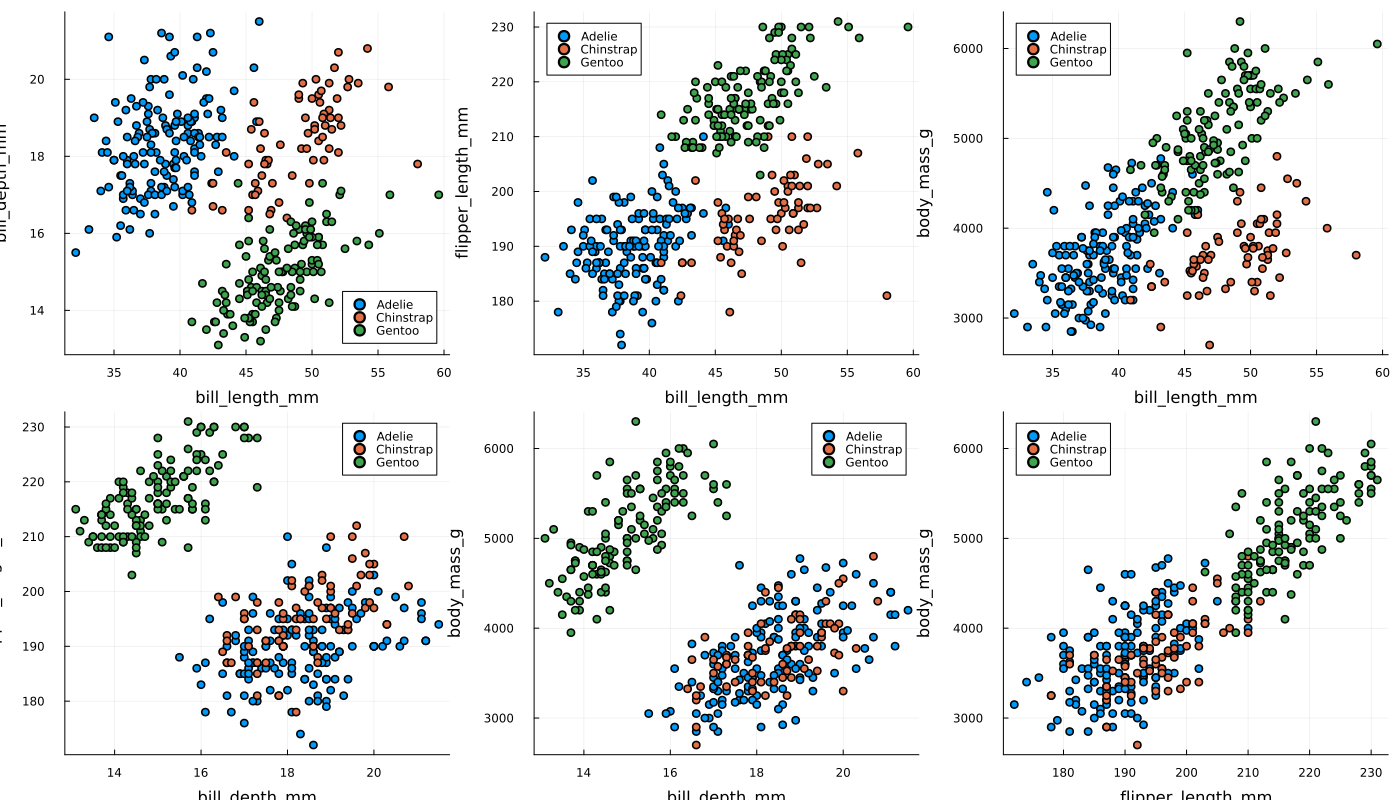

In [5]:
x1 = data_c[:,1]
x2 = data_c[:,2]
x3 = data_c[:,3]
x4 = data_c[:,4]

layout = @layout [a b; c d]

p1 = scatter(x1, x2, xlabel=names(data_c)[1],ylabel=names(data_c)[2],group=data_r[:,1])
p2 = scatter(x1, x3, xlabel=names(data_c)[1],ylabel=names(data_c)[3],group=data_r[:,1])
p3 = scatter(x1, x4, xlabel=names(data_c)[1],ylabel=names(data_c)[4],group=data_r[:,1])
p4 = scatter(x2, x3, xlabel=names(data_c)[2],ylabel=names(data_c)[3],group=data_r[:,1])
p5 = scatter(x2, x4, xlabel=names(data_c)[2],ylabel=names(data_c)[4],group=data_r[:,1])
p6 = scatter(x3, x4, xlabel=names(data_c)[3],ylabel=names(data_c)[4],group=data_r[:,1])
plot(p1,p2,p3,p4,p5,p6,size=(1400,800))

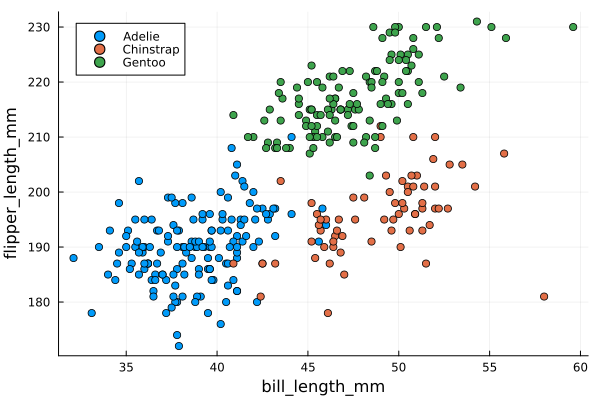

In [6]:
DataC = DataCluster[!,[1,3,5]] #porque o gráfico que parece melhor é o 3 , que é com a primeira e a quarta coluna
X = DataC[!,[1,2]]
D=pairwise(Euclidean(),Matrix(X)', dims=2)
scatter(DataC[:,1], DataC[:,2], xlabel=names(X)[1],ylabel=names(X)[2],group=DataC[:,3])


In [7]:
c = kmeans(D,3; init=:kmpp, maxiter=100)
#select!(DataC,Not(:cluster3))
insertcols!(DataC,3,:cluster3=>c.assignments)

Row,bill_length_mm,flipper_length_mm,cluster3,species
,Float64,Float64,Int64,String15
1,39.1,181.0,3,Adelie
2,39.5,186.0,3,Adelie
3,40.3,195.0,3,Adelie
4,36.7,193.0,3,Adelie
5,39.3,190.0,3,Adelie
6,38.9,181.0,3,Adelie
7,39.2,195.0,3,Adelie
8,34.1,193.0,3,Adelie
9,42.0,190.0,3,Adelie


In [8]:
K = hclust(D, linkage=:ward_presquared,branchorder=:optimal)
l = cutree(K;k=3)

#select!(DataC,Not(:hclust))
insertcols!(DataC,5,:hclust=>l)

Row,bill_length_mm,flipper_length_mm,cluster3,species,hclust
,Float64,Float64,Int64,String15,Int64
1,39.1,181.0,3,Adelie,1
2,39.5,186.0,3,Adelie,1
3,40.3,195.0,3,Adelie,2
4,36.7,193.0,3,Adelie,1
5,39.3,190.0,3,Adelie,1
6,38.9,181.0,3,Adelie,1
7,39.2,195.0,3,Adelie,2
8,34.1,193.0,3,Adelie,1
9,42.0,190.0,3,Adelie,1


In [9]:
L = dbscan(Matrix(X)',2, min_neighbors = 5, min_cluster_size = 20)
#select!(DataC,Not(:dbscan))
insertcols!(DataC, 6, :dbscan=>L.assignments)

Row,bill_length_mm,flipper_length_mm,cluster3,species,hclust,dbscan
,Float64,Float64,Int64,String15,Int64,Int64
1,39.1,181.0,3,Adelie,1,1
2,39.5,186.0,3,Adelie,1,1
3,40.3,195.0,3,Adelie,2,1
4,36.7,193.0,3,Adelie,1,1
5,39.3,190.0,3,Adelie,1,1
6,38.9,181.0,3,Adelie,1,1
7,39.2,195.0,3,Adelie,2,1
8,34.1,193.0,3,Adelie,1,1
9,42.0,190.0,3,Adelie,1,1


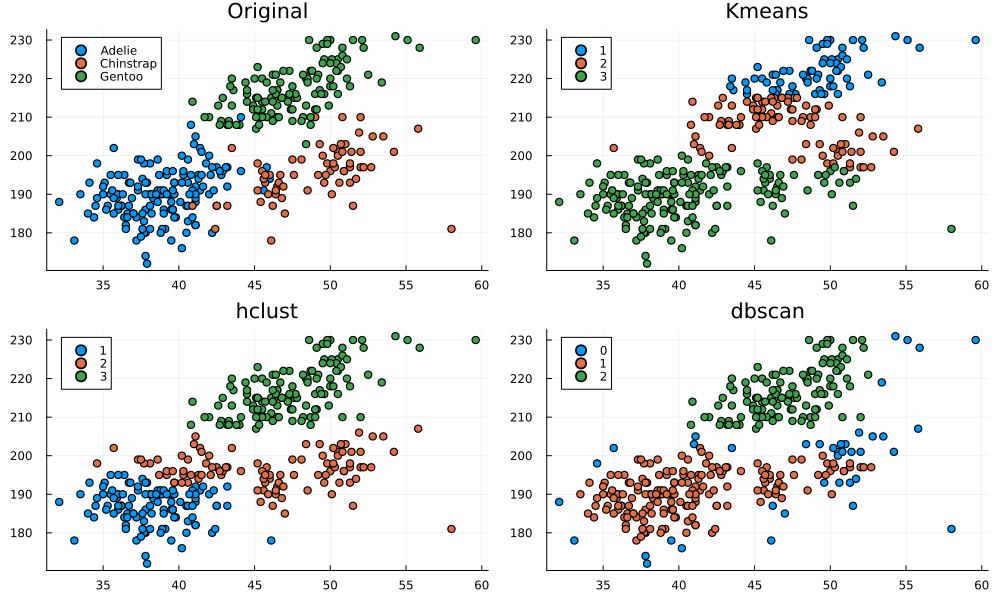

In [10]:
p1 = scatter(DataC[:,1], DataC[:,2], mode="markers", title="Original", group=DataC[:,:species])
p2 = scatter(DataC[:,1],DataC[:,2], group=DataC[!,"cluster3"], mode="markers", title="Kmeans")
p3 = scatter(DataC[:,1],DataC[:,2], group=DataC[!,"hclust"], mode="markers", title="hclust")
p4 = scatter(DataC[:,1],DataC[:,2], group=DataC[!,"dbscan"], mode="markers", title="dbscan")
plot(p1,p2,p3,p4,size=(1000,600))